# Goal of this project

Given a bitcoin address along with some meta-data pertaining to that address,  
we are challenged to predict if that address has been used to receive ransoms in the past.

## Setup

#### Data manipulation libraries:

In [1]:
import pandas as pd
import numpy  as np

#### Visualization libraries:

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

#### Storage libraries:

In [3]:
import pickle

#### Pre-processing libraries:

In [4]:
from sklearn.preprocessing    import StandardScaler
from sklearn.model_selection  import GridSearchCV
from sklearn.model_selection  import train_test_split

In [5]:
from sklearn                  import decomposition
from sklearn.pipeline         import Pipeline

#### Classifier Libraries:

In [6]:
from sklearn.neighbors     import KNeighborsClassifier
from sklearn.linear_model  import LogisticRegression 
from sklearn.ensemble      import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes   import BernoulliNB, MultinomialNB, GaussianNB
from mlxtend.classifier    import StackingClassifier


In [7]:
from sklearn.metrics       import recall_score, precision_score, f1_score, accuracy_score, log_loss,plot_roc_curve 

In [8]:
 from sklearn.metrics      import confusion_matrix ,fbeta_score

## Data-set

In [9]:
file_path = 'under_sample_Data 2.csv'

data = pd.read_csv(file_path)

### Split the data

In [10]:
X = data.drop('label',axis=1)
y = data.label

to_be_dropped = ['address']
X = X.drop(to_be_dropped, axis=1, errors='ignore')

std_scale = StandardScaler()
X_sc = std_scale.fit_transform(X) 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_sc, y,test_size = 0.2, random_state=42)

# Baseline

In [12]:
logit = LogisticRegression(C = 1000) # c=comblictiy , to deal with regularaization. , take c from gridsearch.
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))
print("confusion matrix: \n\n", confusion_matrix(y_test, logit.predict(X_test)))

The score for logistic regression is
Training:  75.74%
Test set:  74.66%
confusion matrix: 

 [[6824 1463]
 [2734 5545]]


In [13]:
y_predict = logit.predict(X_test)

print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))

print("F score::", f1_score(y_test,y_predict))

Default threshold:
Precision: 0.7912,   Recall: 0.6698
F score:: 0.7254529992804343


In [14]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.6909829528461767

## Metrics Functions

In [15]:
def accuracy(actuals, preds):
    return np.mean(actuals == preds)

def precision(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fp = np.sum((actuals == 0) & (preds == 1))
    return tp / (tp + fp)

def recall(actuals, preds):
    tp = np.sum((actuals == 1) & (preds == 1))
    fn = np.sum((actuals == 1) & (preds == 0))
    return tp / (tp + fn)

def F1(actuals, preds):
    p, r = precision(actuals, preds), recall(actuals, preds)
    return 2*p*r / (p + r)

## CLassifier list

In [16]:
lr_model  = LogisticRegression(solver="lbfgs", random_state=1)
knn_model = KNeighborsClassifier(n_neighbors=13, weights='uniform')
rf_model  = RandomForestClassifier(n_estimators=100, random_state=1)
et_model  = ExtraTreesClassifier(n_estimators=100, random_state=1)
Br_model  = BernoulliNB()
Gn_model  = GaussianNB()



models = ["lr_model", "knn_model", "rf_model", "et_model","Br_model","Gn_model"]

# Models:

In [17]:
for model_name in models:
    
    curr_model = eval(model_name)
    
    curr_model.fit(X_train, y_train)

In [18]:
model_names = ["lr_model", "knn_model", "rf_model", "et_model","Br_model","Gn_model"]

model_vars = [eval(n) for n in model_names]
model_list = list(zip(model_names, model_vars))

In [19]:
model_list

[('lr_model', LogisticRegression(random_state=1)),
 ('knn_model', KNeighborsClassifier(n_neighbors=13)),
 ('rf_model', RandomForestClassifier(random_state=1)),
 ('et_model', ExtraTreesClassifier(random_state=1)),
 ('Br_model', BernoulliNB()),
 ('Gn_model', GaussianNB())]

In [20]:
# Quick peek at each model performance

for model_name in model_names:
    curr_model = eval(model_name)
    print(f'{model_name} score: {curr_model.score(X_test, y_test)}')

lr_model score: 0.7465893999758542
knn_model score: 0.891283351442714
rf_model score: 0.95508873596523
et_model score: 0.9476638898949656
Br_model score: 0.756549559338404
Gn_model score: 0.6005070626584571


In [21]:
y_predict = lr_model.predict(X_test)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.7912,   Recall: 0.6696
F score:: 0.725369619259453


In [22]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.6908755576601948

In [23]:
y_predict = knn_model.predict(X_test)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.8575,   Recall: 0.9384
F score:: 0.896130111309764


In [24]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9210214339908953

In [25]:
y_predict = rf_model.predict(X_test)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.9547,   Recall: 0.9554
F score:: 0.9550833132093697


In [26]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9552909350015701

In [27]:
y_predict = et_model.predict(X_test)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.9459,   Recall: 0.9496
F score:: 0.9477427520945092


In [28]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9488751568987158

In [29]:
y_predict = Br_model.predict(X_test)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.8377,   Recall: 0.6361
F score:: 0.7231033299004462


In [30]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.6682401908532561

In [31]:
y_predict = Gn_model.predict(X_test)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.5572,   Recall: 0.9768
F score:: 0.7096349596349596


In [32]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.8489575678683154

# Voting Methods

### Max Voting

In [54]:
# create voting classifier
voting_classifer = VotingClassifier(estimators= model_list,
                                    voting='hard', #<-- sklearn calls this hard voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model', LogisticRegression(random_state=1)),
                             ('knn_model',
                              KNeighborsClassifier(n_neighbors=13)),
                             ('rf_model',
                              RandomForestClassifier(random_state=1)),
                             ('et_model', ExtraTreesClassifier(random_state=1)),
                             ('Br_model', BernoulliNB()),
                             ('Gn_model', GaussianNB())],
                 n_jobs=-1)

In [55]:
# get accuracy (model to beat: ETC with 0.0.947 accuracy)
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.9305807074731377

In [56]:
y_predict = voting_classifer.predict(X_test)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.9376,   Recall: 0.9225
F score:: 0.929980516317584


In [57]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.925450182981508

### Average Voting

In [58]:
# create voting classifier
voting_classifer = VotingClassifier(estimators=model_list,
                                    voting='soft', #<-- sklearn calls this soft voting
                                    n_jobs=-1)
voting_classifer.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model', LogisticRegression(random_state=1)),
                             ('knn_model',
                              KNeighborsClassifier(n_neighbors=13)),
                             ('rf_model',
                              RandomForestClassifier(random_state=1)),
                             ('et_model', ExtraTreesClassifier(random_state=1)),
                             ('Br_model', BernoulliNB()),
                             ('Gn_model', GaussianNB())],
                 n_jobs=-1, voting='soft')

In [59]:
# get accuracy (model to beat: ETC with 0.0.947 accuracy)
y_pred = voting_classifer.predict(X_test)
accuracy_score(y_test, y_pred)

0.9305203428709404

In [60]:
y_predict = voting_classifer.predict(X_test)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.9102,   Recall: 0.9552
F score:: 0.9321624329580951


In [61]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9458425031097502

### Weighted Voting

In [62]:
# create voting classifier
weights = [1.5,3.8,4.2,2.2,3.1,2.4]
voting_model = VotingClassifier(estimators=model_list,
                                    voting='soft', 
                                    weights = weights,  #include weights
                                    n_jobs=-1)
voting_model.fit(X_train, y_train)

VotingClassifier(estimators=[('lr_model', LogisticRegression(random_state=1)),
                             ('knn_model',
                              KNeighborsClassifier(n_neighbors=13)),
                             ('rf_model',
                              RandomForestClassifier(random_state=1)),
                             ('et_model', ExtraTreesClassifier(random_state=1)),
                             ('Br_model', BernoulliNB()),
                             ('Gn_model', GaussianNB())],
                 n_jobs=-1, voting='soft',
                 weights=[1.5, 3.8, 4.2, 2.2, 3.1, 2.4])

In [63]:
# Get accuracy (model to beat: RF with 0.8136 accuracy)
y_pred = voting_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9369793553060485

In [64]:
y_predict = voting_classifer.predict(X_test)
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.9102,   Recall: 0.9552
F score:: 0.9321624329580951


In [65]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.9458425031097502

### Stacking Classifier

In [45]:
stacked = StackingClassifier(
    classifiers=model_vars, meta_classifier=RandomForestClassifier(), use_probas=False)

In [46]:
stacked.fit(X_train, y_train)

StackingClassifier(classifiers=[LogisticRegression(random_state=1),
                                KNeighborsClassifier(n_neighbors=13),
                                RandomForestClassifier(random_state=1),
                                ExtraTreesClassifier(random_state=1),
                                BernoulliNB(), GaussianNB()],
                   meta_classifier=RandomForestClassifier())

In [47]:
y_pred = stacked.predict(X_test)
accuracy_score(y_test, y_pred)

0.9500181093806592

In [48]:
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), 
                                                     recall_score(y_test, y_predict)))
print("F score::", f1_score(y_test,y_predict))

Precision: 0.5572,   Recall: 0.9768
F score:: 0.7096349596349596


In [49]:
fbeta_score(y_test,y_predict,2)

/Users/macbookproretina13inch/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass beta=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


0.8489575678683154

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve

fpr, tpr, thresholds = roc_curve(y_test, stacked.predict_proba(X_test)[:,1])

ROC AUC score =  0.9606547395668729


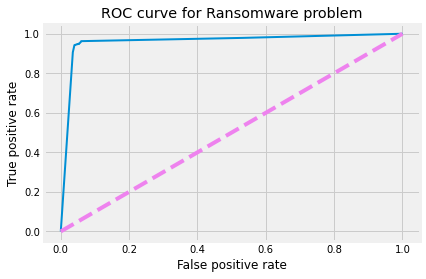

In [51]:
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for Ransomware problem');
print("ROC AUC score = ", roc_auc_score(y_test, stacked.predict_proba(X_test)[:,1]))

In [52]:
def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_test)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_test, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['White', 'Ransomware'],
           yticklabels=['White', 'Ransomware']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

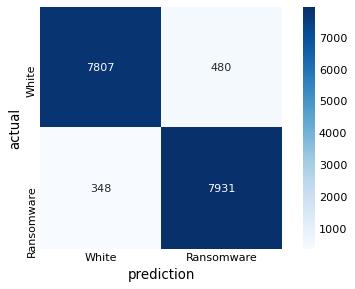

In [53]:
make_confusion_matrix(stacked)

### Store the models in Pickle files

In [ ]:
for model in model_names:
    pickle.dump(model, open('model.pkl', 'wb'))